In [ ]:
from manopth.manolayer import ManoLayer
import numpy as np
import torch.nn as nn
from manopth.demo import display_hand
import torch

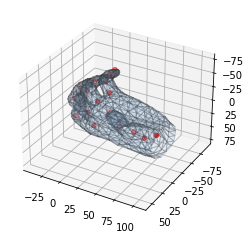

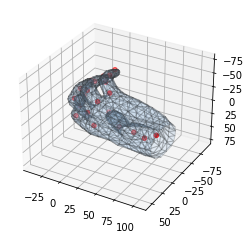

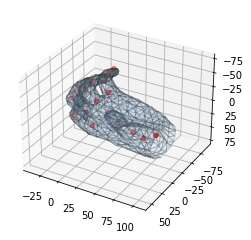

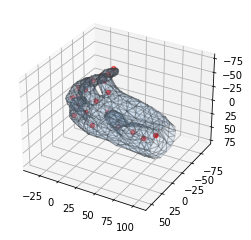

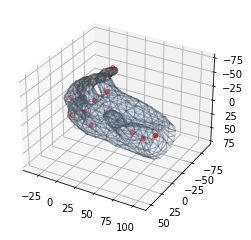

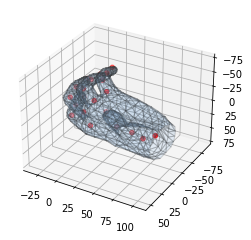

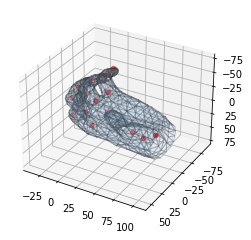

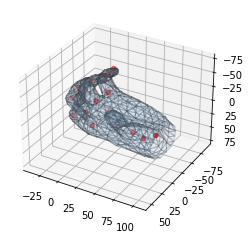

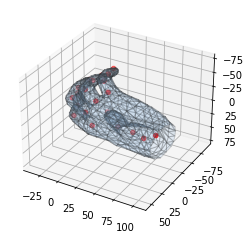

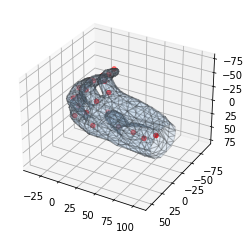

In [31]:
batch_size = 1

# number of principal componenets for pose space
ncomps = 45
mano_path = "/home/danny/datasets/MANO/models"

mano_layer = ManoLayer(
    center_idx = 9,
    flat_hand_mean=False,
    side="right",
    mano_root=mano_path,
    ncomps=ncomps,
    use_pca= False,
    root_rot_mode="axisang",
    joint_rot_mode="axisang"
)

rot_min_list = [
    -10.0, -10.0, -10.0, # 0-2 global
    -0.25, -0.5, -1.0, # 3-5 - index finger first joint
    0.0, 0.0, -1.0, # 6-8 index finger second joint
    0.0, 0.0, -0.3, # 9-11 index finger third joint
    -0.25, -0.5, -1.0, # 12-14
    0.0, 0.0, -1.0, # 15-17
    0.0, 0.0, -0.2,
    -0.25, -0.5, -0.75,
    -1.0, 0.0, -0.75,
    0.0, 0.0, -0.75,
    -0.25, -0.5, -1.0,
    0.0, 0.0, -1.0,
    0.0, 0.0, -0.5,
    -0.5, -1.0, -1.0,
    0.0, -1.0, 0.0,
    0.0, -1.5, -0.5
]

rot_max_list = [10.0, 10.0, 10.0, 0.25, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.25, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.25, 0.5, 1.5, 1.0, 0.0, 1.0, 0.0, 0.0, 1.5, 0.25, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, -0.5, 0.5, 1.5, 0.0, 0.5, 0.0, 0.0, 1.0, -0.5]


idx = 9
pose = torch.zeros((1, 48))
shape = torch.tensor([[0., 0, 0, 0, 0, 0, 0, 0, 0, 0]])

min_val = -5 # rot_min_list[idx]
max_val = 5 # rot_max_list[idx]
values = np.linspace(min_val, max_val, 10)
for value in values:
    pose[0, idx] = value
    hand_verts, hand_joints = mano_layer(pose, shape)
    display_hand(
        {"verts": hand_verts, "joints": hand_joints},
        mano_faces=mano_layer.th_faces
    )


In [ ]:
mano_path = "/home/danny/datasets/MANO/models"
mano_layer = ManoLayer(center_idx = 9,
	flat_hand_mean=False,
	side="right",
	mano_root=mano_path,
	ncomps=45,
	use_pca=False,
	root_rot_mode="axisang",
	joint_rot_mode="axisang")
	
input_pose = torch.zeros(1, 48)
input_shape = torch.zeros(1, 10)

min_val = 0
max_val = 15
values = np.arange(min_val, max_val, 1)
for value in values:
    pose[0, 3] = value
    hand_verts, hand_joints = mano_layer(input_pose, input_shape)
    display_hand(
        {"verts": hand_verts, "joints": hand_joints},
        mano_faces=mano_layer.th_faces
    )